In [14]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


Построим воронку продаж по неделям

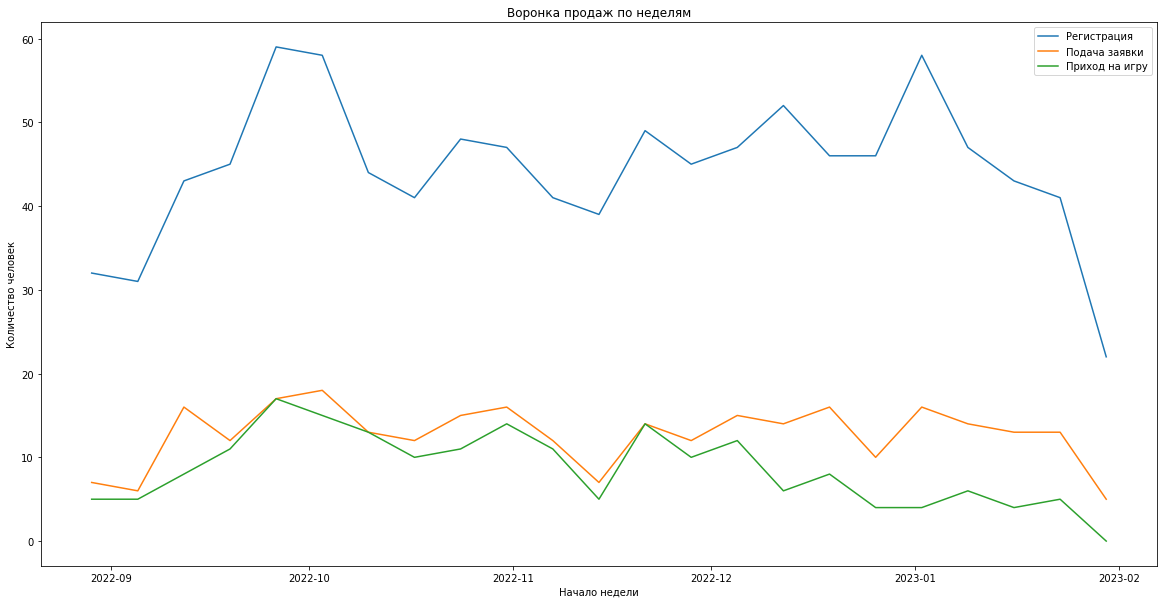

In [19]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)

cur = conn.cursor()
query = """
SELECT date_trunc('week', c.visit_dttm) as week_start,
       COUNT(DISTINCT c.client_rk) as visitors,
       COUNT(DISTINCT ac.client_rk) as registered,
       COUNT(DISTINCT ap.account_rk) as applied,
       COUNT(DISTINCT CASE WHEN g.game_flg =1 THEN ap.account_rk END) as attended
FROM msu_analytics.client c
LEFT JOIN msu_analytics.account ac USING(client_rk)
LEFT JOIN msu_analytics.application ap USING(account_rk)
LEFT JOIN msu_analytics.game g USING(game_rk)
    GROUP BY 1
    ORDER BY 1
""" #SQL запрос

cur.execute(query)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(rows, columns=columns) #создам датафрейм
cur.close()
conn.close()

fig, ax = plt.subplots(figsize=(20, 10))

#ax.plot(df['week_start'], df['visitors'], label='Посетители')
ax.plot(df['week_start'], df['registered'], label='Регистрация')
ax.plot(df['week_start'], df['applied'], label='Подача заявки')
ax.plot(df['week_start'], df['attended'], label='Приход на игру')

ax.legend()
ax.set_xlabel('Начало недели')
ax.set_ylabel('Количество человек')
ax.set_title('Воронка продаж по неделям')

plt.show()

In [20]:
df #собранный датафрейм по неделям

,week_start,visitors,registered,applied,attended
0,2022-08-29,111,32,7,5
1,2022-09-05,184,31,6,5
2,2022-09-12,167,43,16,8
3,2022-09-19,181,45,12,11
4,2022-09-26,195,59,17,17
5,2022-10-03,204,58,18,15
6,2022-10-10,190,44,13,13
7,2022-10-17,171,41,12,10
8,2022-10-24,189,48,15,11
9,2022-10-31,197,47,16,14


Теперь построим воронку продаж по месяцам

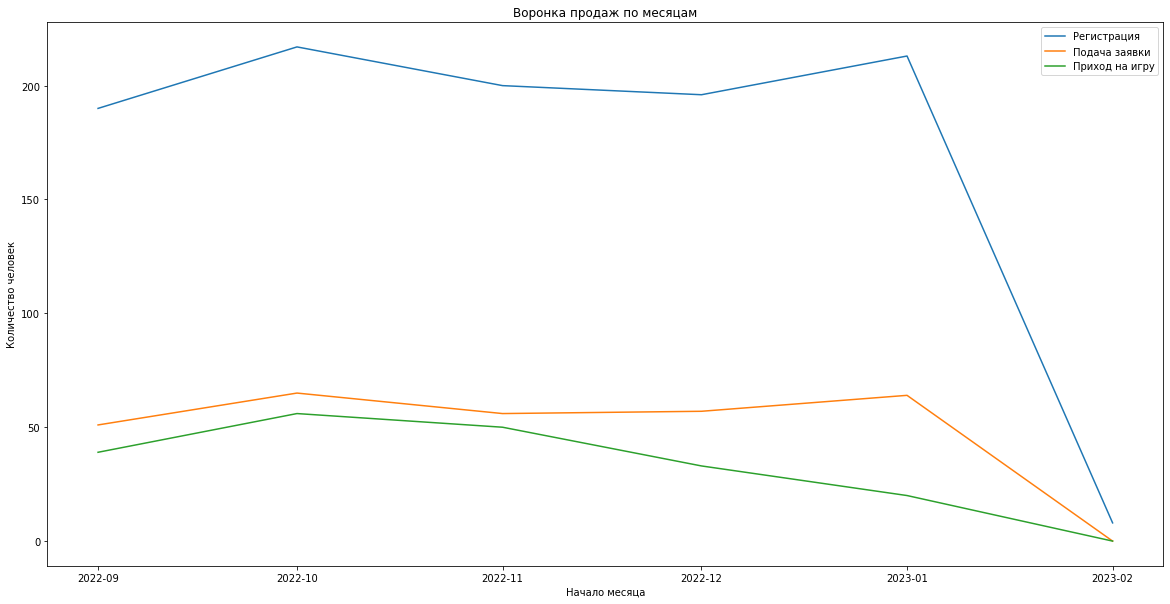

In [21]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)

cur = conn.cursor()
query = """
SELECT date_trunc('month', c.visit_dttm) as week_start,
       COUNT(DISTINCT c.client_rk) as visitors,
       COUNT(DISTINCT ac.client_rk) as registered,
       COUNT(DISTINCT ap.account_rk) as applied,
       COUNT(DISTINCT CASE WHEN g.game_flg =1 THEN ap.account_rk END) as attended
FROM msu_analytics.client c
LEFT JOIN msu_analytics.account ac USING(client_rk)
LEFT JOIN msu_analytics.application ap USING(account_rk)
LEFT JOIN msu_analytics.game g USING(game_rk)
    GROUP BY 1
    ORDER BY 1
""" #SQL запрос

cur.execute(query)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(rows, columns=columns) #создам датафрейм
cur.close()
conn.close()

fig, ax = plt.subplots(figsize=(20, 10))

#ax.plot(df['week_start'], df['visitors'], label='Посетители')
ax.plot(df['week_start'], df['registered'], label='Регистрация')
ax.plot(df['week_start'], df['applied'], label='Подача заявки')
ax.plot(df['week_start'], df['attended'], label='Приход на игру')

ax.legend()
ax.set_xlabel('Начало месяца')
ax.set_ylabel('Количество человек')
ax.set_title('Воронка продаж по месяцам')

plt.show()

In [22]:
df #собранный датафрейм по месяцам

,week_start,visitors,registered,applied,attended
0,2022-09-01,778,190,51,39
1,2022-10-01,843,217,65,56
2,2022-11-01,786,200,56,50
3,2022-12-01,805,196,57,33
4,2023-01-01,852,213,64,20
5,2023-02-01,32,8,0,0


Теперь поговорим о точках роста.
 - Можно заметить, что после начала сентября продажи начали увеличиваться. Возможно, это связано с начало учебного года, школьнки/студенты давно не виделись друг с другом, и таким образом решили провести досуг. Значит, можно делать различные акции перед начало учебного года, чтобы завлечь еще большее кол-во людей
 - В период с середины декабря по середину января наблюдается большое кол-во регистраций, но малое кол-во приходов на игру. Вероятнее всего, связано это с Новым годом, люди изначально запланировали, а потом отменили из-за своих дел. Можем также запустить различные акции перед Новым годом, чтобы увеличить приход на игру